Eda İpek SANLI - 20040101006
<br>
İstanbul Topkapı Üniversitesi
<br>
Mühendislik Fakültesi
<br>
Bilgisayar Mühendisliği
<br>
Veri Madenciliği 
<br>
Sajjad Nematzadeh Miandoab

Student Performance Prediction Dataset linki : https://www.kaggle.com/datasets/rkiattisak/student-performance-in-mathematics/data

Veri Seti Hakkında Bilgi
<br>
Bu veri seti lise öğrencilerinin matematikteki performasına ilişkin demografik, okuma ve yazma not bilgilerini içerir. Veriler Amerika Birleşik Devletlerinde bulunan 3 farklı liseden alınmıştır. 


In [3]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("exams.csv")
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group D,some college,standard,completed,59,70,78
1,male,group D,associate's degree,standard,none,96,93,87
2,female,group D,some college,free/reduced,none,57,76,77
3,male,group B,some college,free/reduced,none,70,70,63
4,female,group D,associate's degree,standard,none,83,85,86
...,...,...,...,...,...,...,...,...
995,male,group C,some college,standard,none,77,77,71
996,male,group C,some college,standard,none,80,66,66
997,female,group A,high school,standard,completed,67,86,86
998,male,group E,high school,standard,none,80,72,62


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [6]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [7]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [8]:
df.describe()

,math score,reading score,writing score
count,1000.000000,1000.000000,1000.000000
mean,67.810000,70.382000,69.140000
std,15.250196,14.107413,15.025917
min,15.000000,25.000000,15.000000
25%,58.000000,61.000000,59.000000
50%,68.000000,70.500000,70.000000
75%,79.250000,80.000000,80.000000
max,100.000000,100.000000,100.000000


In [15]:
heatmap_data = df[['math score', 'reading score', 'writing score']]
heatmap_data.corr()

,math score,reading score,writing score
math score,1.000000,0.811767,0.790055
reading score,0.811767,1.000000,0.948909
writing score,0.790055,0.948909,1.000000


In [10]:
data = np.random.rand(200)
count, bins_count = np.histogram(data, bins=10)


In [11]:
education_types = df['parental level of education'].unique()
education_types

array(['some college', "associate's degree", 'some high school',
       "bachelor's degree", "master's degree", 'high school'],
      dtype=object)

In [19]:
df[df['parental level of education'] == education_types[4]].describe()


,math score,reading score,writing score
count,75.000000,75.000000,75.000000
mean,71.026667,71.973333,71.746667
std,14.189807,13.689583,14.497058
min,32.000000,35.000000,37.000000
25%,62.000000,64.500000,62.500000
50%,70.000000,72.000000,74.000000
75%,82.000000,82.000000,81.000000
max,100.000000,98.000000,100.000000


Text(0, 0.5, 'Yoğunluk')

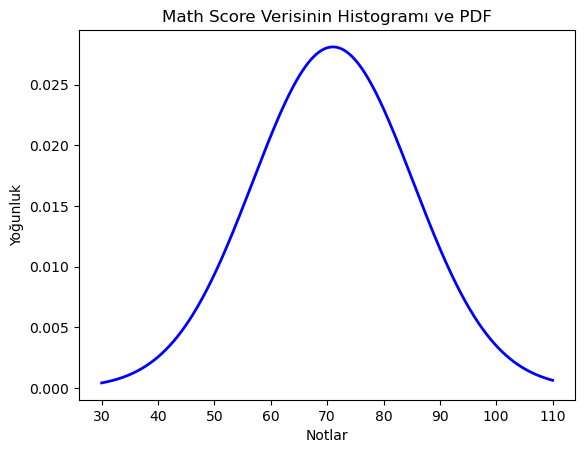

In [13]:
x = np.linspace(30, 110, 5000)
pdf = (1 / (14.189807 * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - 71.026667) / 14.189807)**2)
plt.plot(x, pdf, linewidth=2, color='blue')
plt.title('Math Score Verisinin Histogramı ve PDF')
plt.xlabel('Notlar')
plt.ylabel('Yoğunluk')

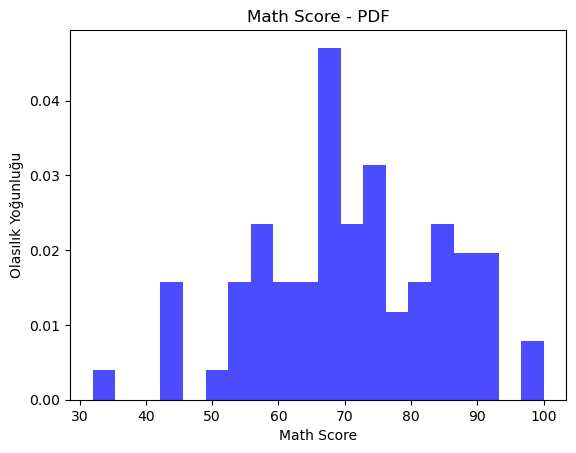

In [24]:
plt.hist(df[df['parental level of education'] == education_types[4]]['math score'], bins=20, density=True, alpha=0.7, color='blue')
plt.title('Math Score - PDF')
plt.xlabel('Math Score')
plt.ylabel('Olasılık Yoğunluğu')
plt.show()

In [ ]:
plt.figure(figsize=(10, 4))

Text(0, 0.5, 'Yoğunluk')

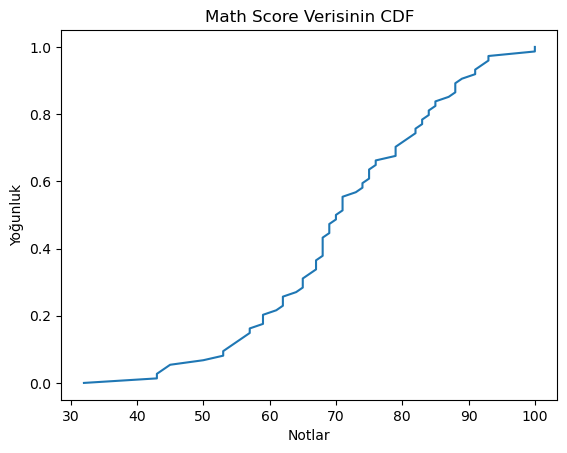

In [14]:
data=df[df['parental level of education'] == education_types[4]]['math score']

x = np.sort(data)

# #calculate CDF values
y = 1. * np.arange(len(data)) / (len(data) - 1)

#plot CDF
plt.plot(x, y)
plt.title('Math Score Verisinin CDF')
plt.xlabel('Notlar')
plt.ylabel('Yoğunluk')
